Importing required files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture

Importing dataset and splitting class label seperately

In [2]:
#df = pd.read_csv(r"C:\Users\manik\OneDrive\Desktop\college\Sem 7\ML theory\powerconsumption.csv")
df = pd.read_csv(r"C:\Users\adity\ML\Project\powerconsumption.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce', dayfirst=False)
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
print(df)

                 Datetime  Temperature  Humidity  WindSpeed  \
0     2017-01-01 00:00:00        6.559      73.8      0.083   
1     2017-01-01 00:10:00        6.414      74.5      0.083   
2     2017-01-01 00:20:00        6.313      74.5      0.080   
3     2017-01-01 00:30:00        6.121      75.0      0.083   
4     2017-01-01 00:40:00        5.921      75.7      0.081   
...                   ...          ...       ...        ...   
52411 2017-12-30 23:10:00        7.010      72.4      0.080   
52412 2017-12-30 23:20:00        6.947      72.6      0.082   
52413 2017-12-30 23:30:00        6.900      72.8      0.086   
52414 2017-12-30 23:40:00        6.758      73.0      0.080   
52415 2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.10

In [3]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-4].values
print(x, "\n",y)

[[Timestamp('2017-01-01 00:00:00') 6.559 73.8 ... 20240.96386 0 6]
 [Timestamp('2017-01-01 00:10:00') 6.414 74.5 ... 20131.08434 0 6]
 [Timestamp('2017-01-01 00:20:00') 6.313 74.5 ... 19668.43373 0 6]
 ...
 [Timestamp('2017-12-30 23:30:00') 6.9 72.8 ... 13806.48259 23 5]
 [Timestamp('2017-12-30 23:40:00') 6.758 73.0 ... 13512.60504 23 5]
 [Timestamp('2017-12-30 23:50:00') 6.58 74.1 ... 13345.4982 23 5]] 
 [20240.96386 20131.08434 19668.43373 ... 13806.48259 13512.60504
 13345.4982 ]


In [4]:
print(df.isna().sum())

Datetime                   0
Temperature               32
Humidity                  16
WindSpeed                 20
GeneralDiffuseFlows       28
DiffuseFlows              16
PowerConsumption_Zone1    31
PowerConsumption_Zone2    20
PowerConsumption_Zone3     0
Hour                       0
Day                        0
Month                      0
dtype: int64


Handling null values:

In [5]:
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(x[:,1:8])
x[:,1:8]=imputer.transform(x[:,1:8])
print(x)
print(pd.DataFrame(x).isna().sum())

[[Timestamp('2017-01-01 00:00:00') 6.559 73.8 ... 20240.96386 0 6]
 [Timestamp('2017-01-01 00:10:00') 6.414 74.5 ... 20131.08434 0 6]
 [Timestamp('2017-01-01 00:20:00') 6.313 74.5 ... 19668.43373 0 6]
 ...
 [Timestamp('2017-12-30 23:30:00') 6.9 72.8 ... 13806.48259 23 5]
 [Timestamp('2017-12-30 23:40:00') 6.758 73.0 ... 13512.60504 23 5]
 [Timestamp('2017-12-30 23:50:00') 6.58 74.1 ... 13345.4982 23 5]]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


Divide data into training and testing (8:2)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=1)
print(x_train, x_test, y_train,y_test)

[[Timestamp('2017-11-07 15:20:00') 21.6 63.44 ... 10773.9759 15 1]
 [Timestamp('2017-11-04 16:30:00') 23.11 55.84 ... 11838.07229 16 5]
 [Timestamp('2017-02-18 01:10:00') 9.92 87.7 ... 15497.00503 1 5]
 ...
 [Timestamp('2017-02-06 01:20:00') 10.08 49.68 ... 15566.47236 1 0]
 [Timestamp('2017-03-26 12:40:00') 19.04 54.21 ... 16269.67742 12 6]
 [Timestamp('2017-08-18 04:30:00') 21.12 74.5 ... 20090.7837 4 4]] [[Timestamp('2017-10-13 09:10:00') 21.58 52.96 ... 10743.82979 9 4]
 [Timestamp('2017-08-29 05:00:00') 24.3 93.3 ... 14559.49843 5 1]
 [Timestamp('2017-06-25 19:20:00') 23.39 73.8 ... 30501.41538 19 6]
 ...
 [Timestamp('2017-04-25 05:10:00') 16.71 72.8 ... 14266.18182 5 1]
 [Timestamp('2017-04-07 13:20:00') 13.69 86.5 ... 18251.63636 13 4]
 [Timestamp('2017-09-22 16:50:00') 30.84 19.21 ... 13302.71706 16 4]] [10773.9759  11838.07229 15497.00503 ... 15566.47236 16269.67742
 20090.7837 ] [10743.82979 14559.49843 30501.41538 ... 14266.18182 18251.63636
 13302.71706]


Perform scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,1:]=sc.fit_transform(x_train[:,1:])
x_test[:,1:]=sc.fit_transform(x_test[:,1:])
print(x_train,x_test)

[[Timestamp('2017-11-07 15:20:00') 0.4754696556465662
  -0.30774940031929476 ... -1.0684033345446495 0.502170543390363
  -1.0026064180874088]
 [Timestamp('2017-11-04 16:30:00') 0.7351156256164495 -0.7958095517747009
  ... -0.9077526500908673 0.6464006265806196 0.9958625623036322]
 [Timestamp('2017-02-18 01:10:00') -1.5329177147165083 1.2501899778791479
  ... -0.3553496398228293 -1.5170506212732295 0.9958625623036322]
 ...
 [Timestamp('2017-02-06 01:20:00') -1.50540555895811 -1.1913951482175043
  ... -0.34486189245656235 -1.5170506212732295 -1.502223663185169]
 [Timestamp('2017-03-26 12:40:00') 0.03527516351219336
  -0.9004856105736896 ... -0.23869634649473184 0.06948029381959317
  1.4954798074013924]
 [Timestamp('2017-08-18 04:30:00') 0.39293318837137126 0.4025065569302838
  ... 0.3381906207213161 -1.0843603717024597 0.49624531720587195]] [[Timestamp('2017-10-13 09:10:00') 0.49185646668272487
  -0.9967955992116395 ... -1.0627056022590284 -0.35291626216872884
  0.5151370510409373]
 [Tim

In [ ]:
# Load and clean the data
file_path = "C:/Users/adity/ML/Project/powerconsumption.csv"
data = pd.read_csv(file_path)
data_cleaned = data.dropna()

# Select and scale the features
features = data_cleaned[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 
                         'DiffuseFlows', 'PowerConsumption_Zone1', 
                         'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]
features_scaled = (features - features.mean()) / features.std()

# Hardcoded DBSCAN parameters
eps = 0.5  # Radius of neighborhood
min_samples = 10  # Minimum number of points to form a cluster

# Helper function to find neighbors within eps
def region_query(data, point_idx, eps):
    neighbors = []
    for i in range(len(data)):
        if np.linalg.norm(data[point_idx] - data[i]) < eps:
            neighbors.append(i)
    return neighbors

# Modified expand_cluster function to avoid recursion
def expand_cluster_iterative(data, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(data, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        # Assign the cluster ID to the initial point
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == 0:  # Only process unvisited points
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = region_query(data, neighbor_idx, eps)
                if len(neighbor_neighbors) >= min_samples:
                    neighbors.extend(neighbor_neighbors)
            i += 1
        return True

# DBSCAN clustering
labels = [0] * len(features_scaled)  # Initialize all points as unvisited
cluster_id = 0

for i in range(len(features_scaled)):
    if labels[i] == 0:  # Not yet visited
        if expand_cluster_iterative(features_scaled.values, labels, i, cluster_id + 1, eps, min_samples):
            cluster_id += 1

# Adding labels to the original data
data_cleaned['Cluster'] = labels

# Hardcoded PCA for 2D visualization
def pca_hardcoded(data, n_components=2):
    # Center the data
    data_centered = data - np.mean(data, axis=0)
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(data_centered, rowvar=False)
    
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    
    # Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Project data onto selected eigenvectors
    transformed_data = np.dot(data_centered, selected_eigenvectors)
    
    return transformed_data

# Use a subset of data to reduce processing time (e.g., first 5000 rows)
subset_data = features_scaled.values[:5000]  # Adjust the number as needed
labels = [0] * len(subset_data)

for i in range(len(subset_data)):
    if labels[i] == 0:
        if expand_cluster_iterative(subset_data, labels, i, cluster_id + 1, eps, min_samples):
            cluster_id += 1

# Apply PCA to the subset
features_pca = pca_hardcoded(subset_data)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis', s=5)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering on Subset (Hardcoded)')
plt.show()


KeyboardInterrupt: 

### The above cell was too computationally intensive to run, so we reduce dimensionality and run again

K-Means Inertia: 258382.4940796833
K-Means Silhouette Score: 0.23484576163926824


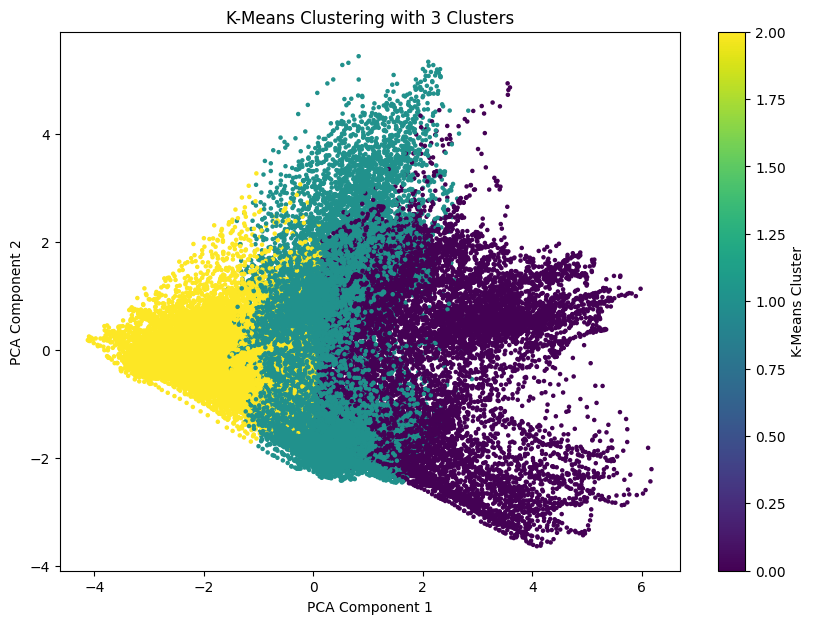

DBSCAN Silhouette Score: -0.5034450625416471


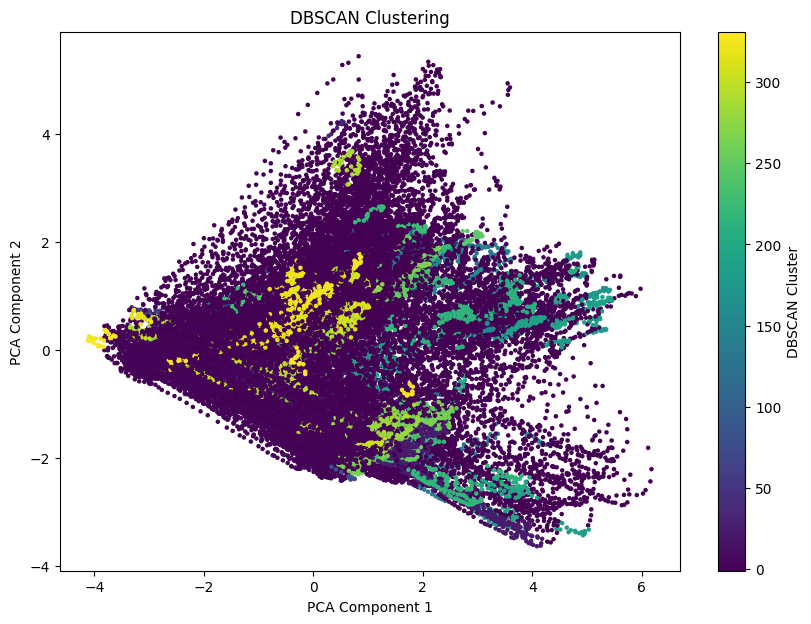

In [ ]:
# Load data and select features
file_path = "C:/Users/adity/ML/Project/powerconsumption.csv"
data = pd.read_csv(file_path)
data_cleaned = data.dropna()

# Feature selection and scaling
features = data_cleaned[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 
                         'DiffuseFlows', 'PowerConsumption_Zone1', 
                         'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]
features_scaled = (features - features.mean()) / features.std()

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

### 1. K-Means Clustering ###
# Optimal number of clusters from silhouette analysis: 3 or 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Evaluate K-Means clustering with inertia and silhouette score
kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(features_scaled, kmeans_labels)
print("K-Means Inertia:", kmeans_inertia)
print("K-Means Silhouette Score:", kmeans_silhouette)

# Plot K-Means clusters
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels, cmap='viridis', s=5)
plt.colorbar(label='K-Means Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()

### 2. DBSCAN Clustering ###
# Parameters based on k-NN plot analysis
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Evaluate DBSCAN clustering
dbscan_silhouette = silhouette_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# Plot DBSCAN clusters
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_labels, cmap='viridis', s=5)
plt.colorbar(label='DBSCAN Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering')
plt.show()



### Clustering Results Summary (Silhoutte Scores)

- **KMeans Clustering with 3 Clusters**: 0.23484576163926824
- **DBSCAN Silhouette Score**: -0.5034450625416471

Agglomerative Clustering Silhouette Score: 0.21679402300698916


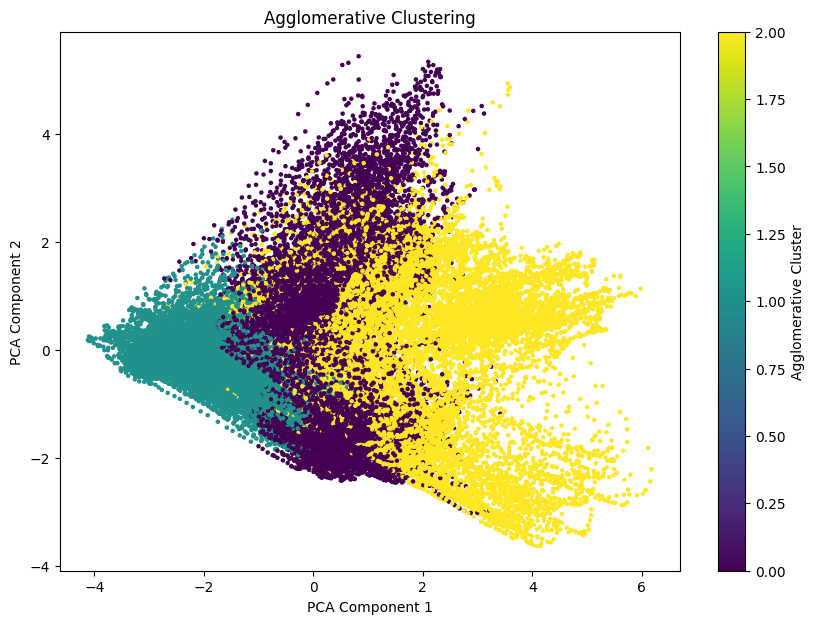

Gaussian Mixture Model Silhouette Score: 0.11250577875994525


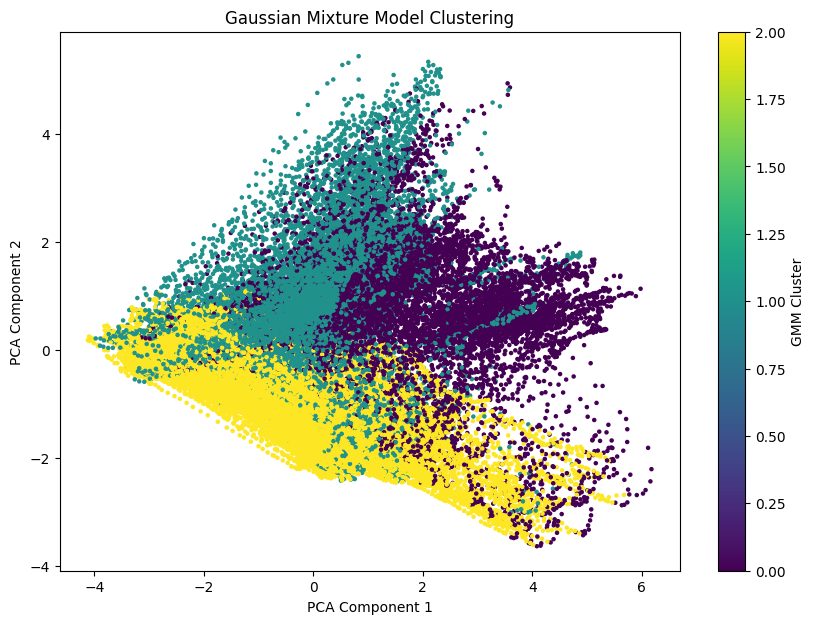

Spectral Clustering Silhouette Score: 0.08131653601450714


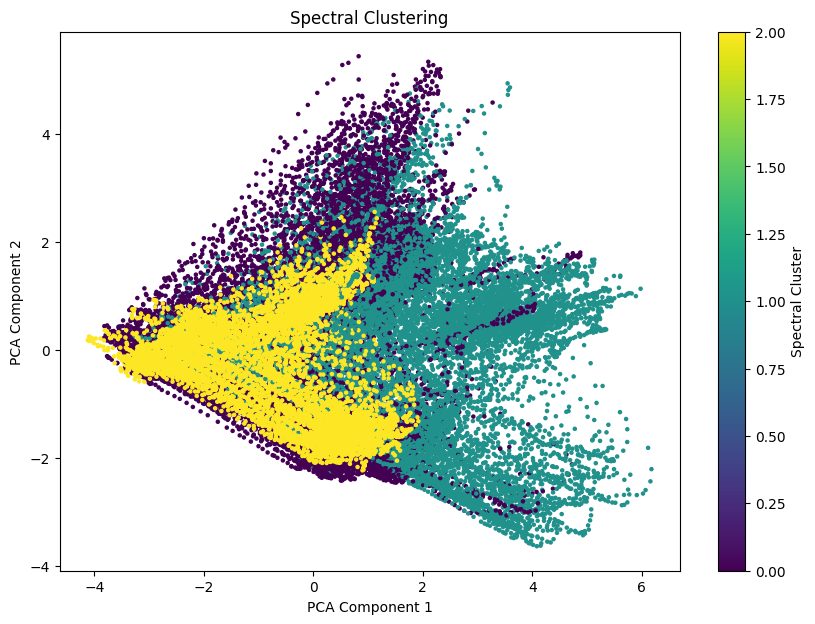

In [ ]:
# Prepare data for clustering
X = features_scaled.values

### 1. Agglomerative Clustering ###
# Using 3 clusters based on K-means findings
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)
agglo_silhouette = silhouette_score(X, agglo_labels)
print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)

# Plot Agglomerative Clustering results
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=agglo_labels, cmap='viridis', s=5)
plt.colorbar(label='Agglomerative Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering')
plt.show()

### 2. Gaussian Mixture Model (GMM) ###
# Fit GMM with 3 components
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X)
gmm_silhouette = silhouette_score(X, gmm_labels)
print("Gaussian Mixture Model Silhouette Score:", gmm_silhouette)

# Plot GMM clustering results
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=gmm_labels, cmap='viridis', s=5)
plt.colorbar(label='GMM Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

### 3. Spectral Clustering ###
# Spectral clustering with 3 clusters
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
spectral_labels = spectral.fit_predict(X)
spectral_silhouette = silhouette_score(X, spectral_labels)
print("Spectral Clustering Silhouette Score:", spectral_silhouette)

# Plot Spectral Clustering results
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=spectral_labels, cmap='viridis', s=5)
plt.colorbar(label='Spectral Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Spectral Clustering')
plt.show()

### Clustering Results Summary (Silhoutte Scores)

- **Agglomerative Clustering Silhouette Score**: 0.21679402300698916
- **Gaussian Mixture Model Silhouette Score**: 0.11250577875994525
- **Spectral Clustering Silhouette Score**: 0.08131653601450714

KMeans on Kernel PCA (RBF)
KMeans Silhouette Score: 0.7429782957014517


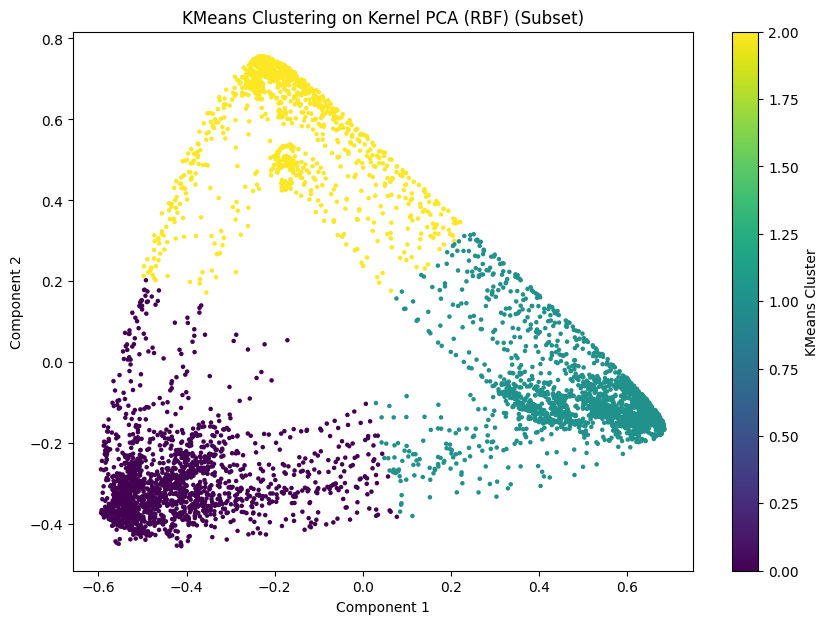

KMeans on Kernel PCA (Poly)
KMeans Silhouette Score: 0.6021024748192707


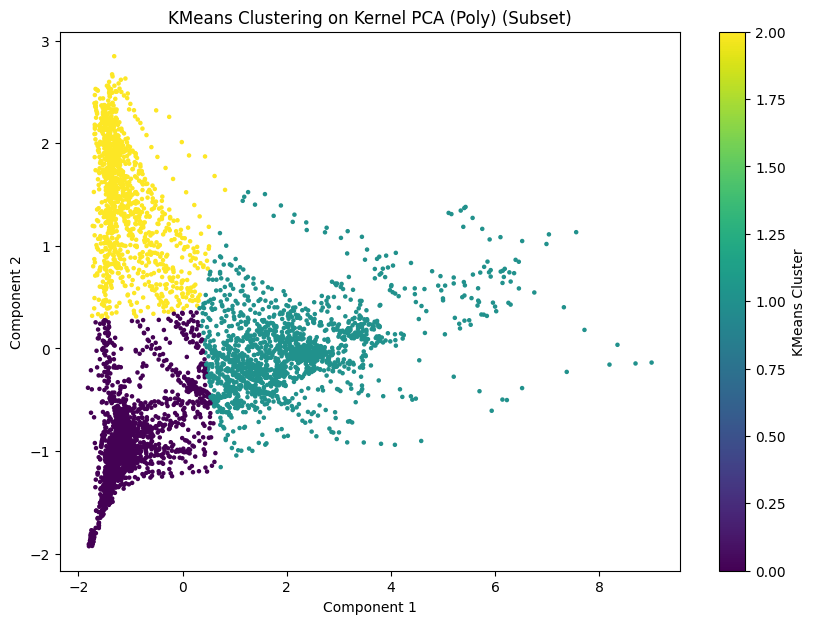

KMeans on Min-Max Scaled
KMeans Silhouette Score: 0.5412402568034891


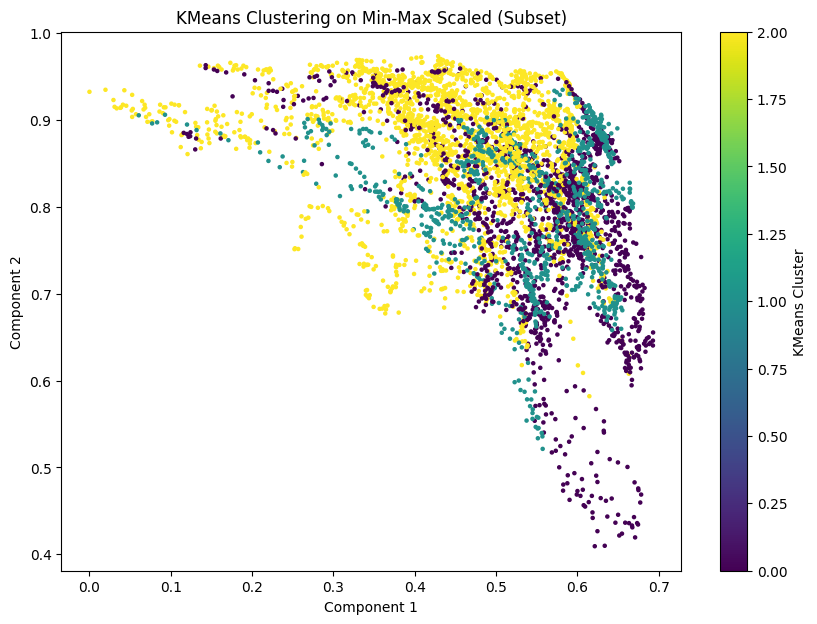

KMeans on Normalized
KMeans Silhouette Score: 0.47551634818190414


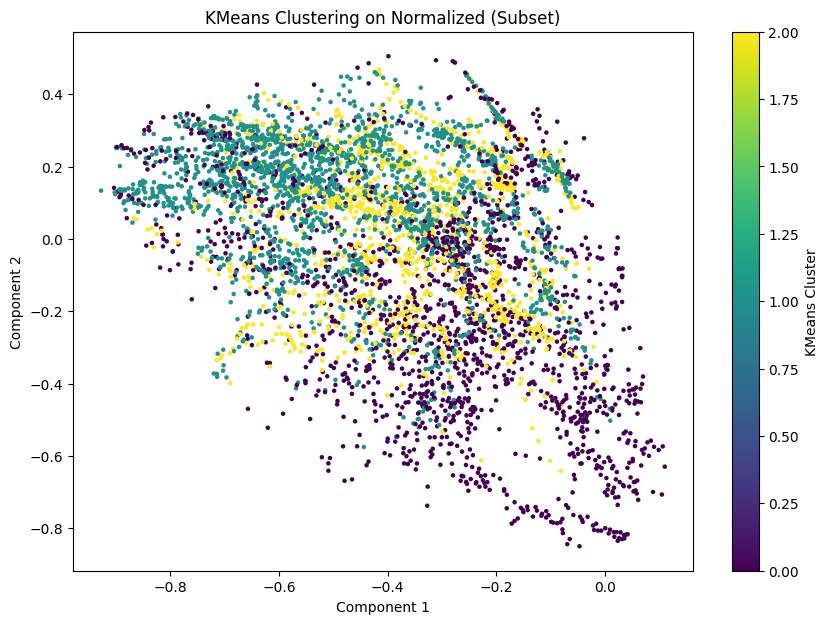

Agglomerative on Kernel PCA (RBF)
Agglomerative Silhouette Score: 0.7076846893491316


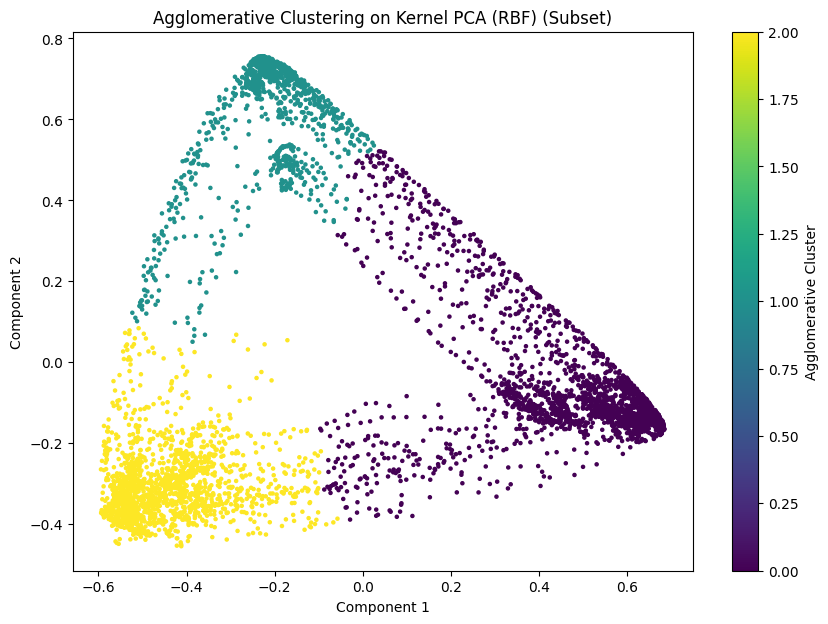

Agglomerative on Kernel PCA (Poly)
Agglomerative Silhouette Score: 0.5481265230187977


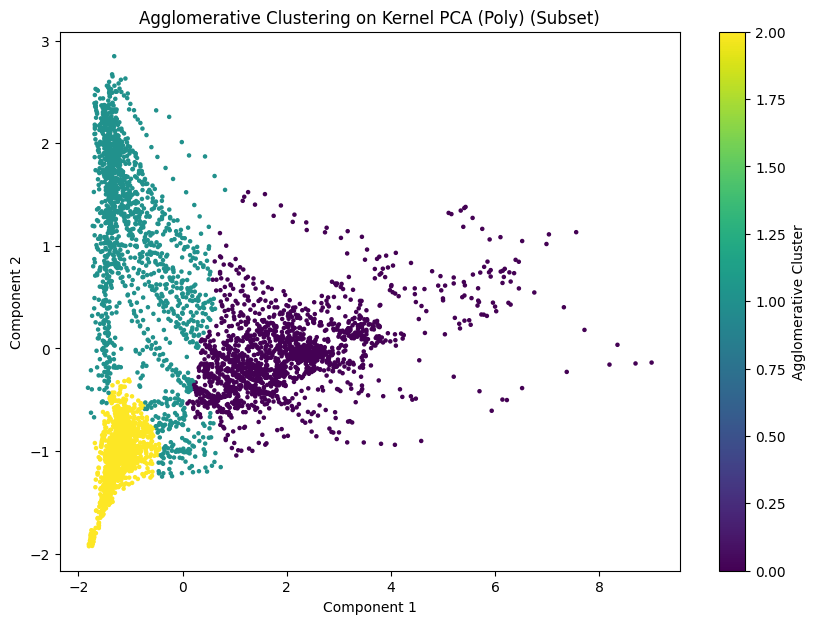

Agglomerative on Min-Max Scaled
Agglomerative Silhouette Score: 0.5250097492076684


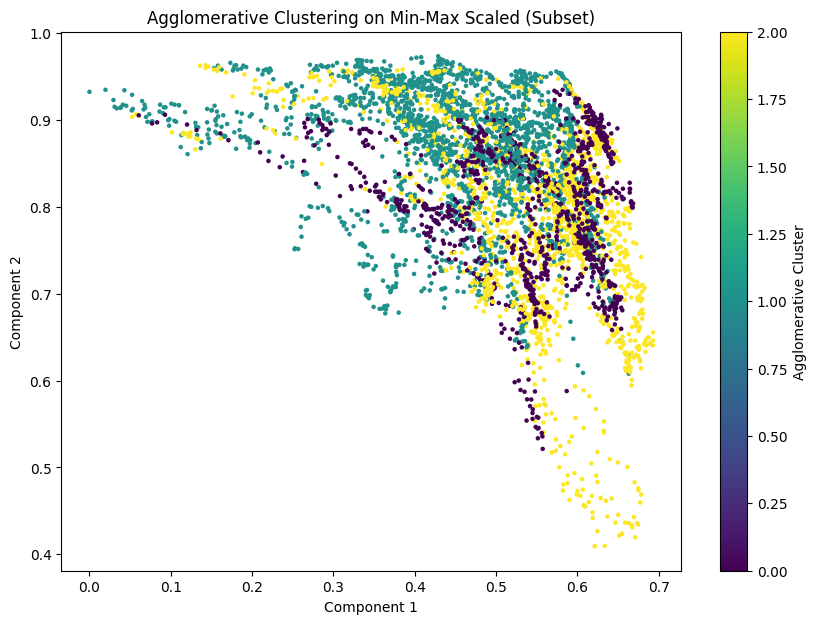

Agglomerative on Normalized
Agglomerative Silhouette Score: 0.4542098433162382


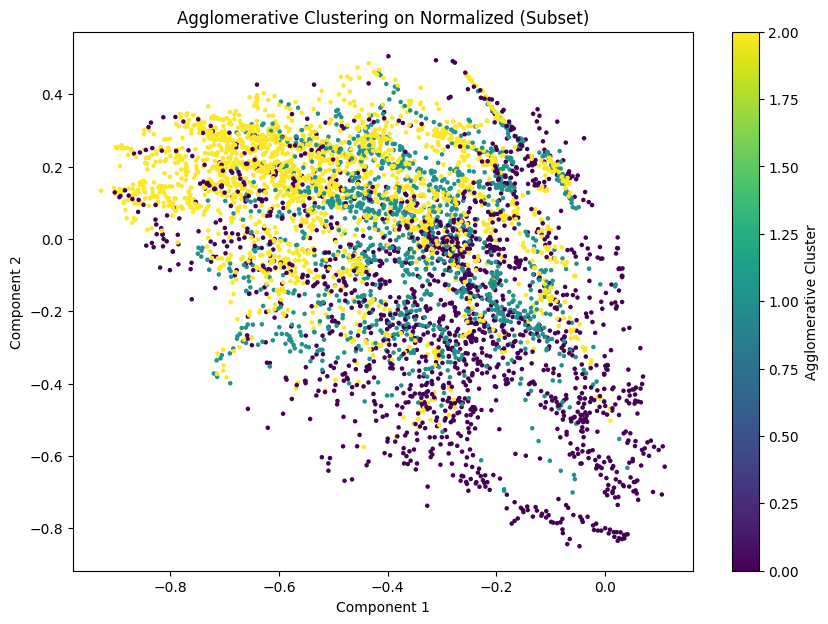

GaussianMixture on Kernel PCA (RBF)
GaussianMixture Silhouette Score: 0.6309643202953807


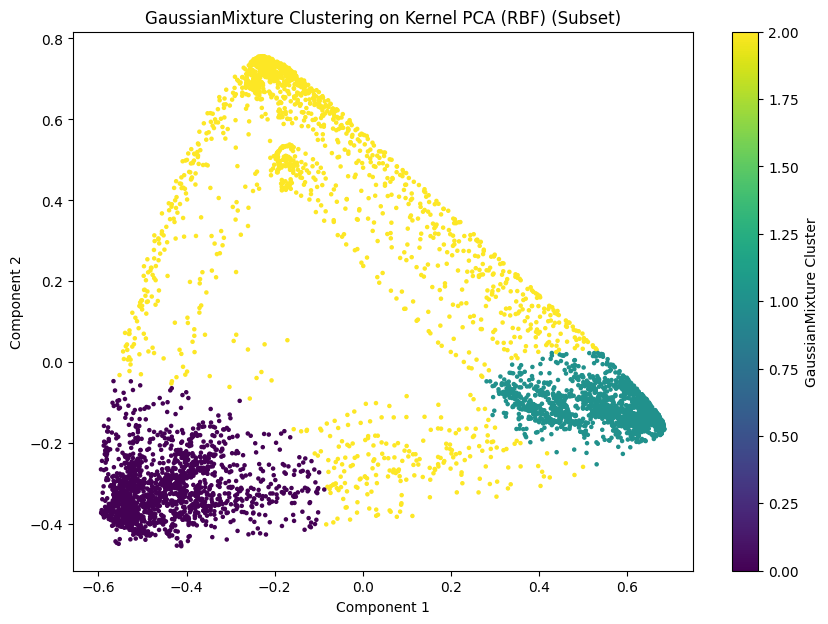

GaussianMixture on Kernel PCA (Poly)
GaussianMixture Silhouette Score: 0.5230578253457938


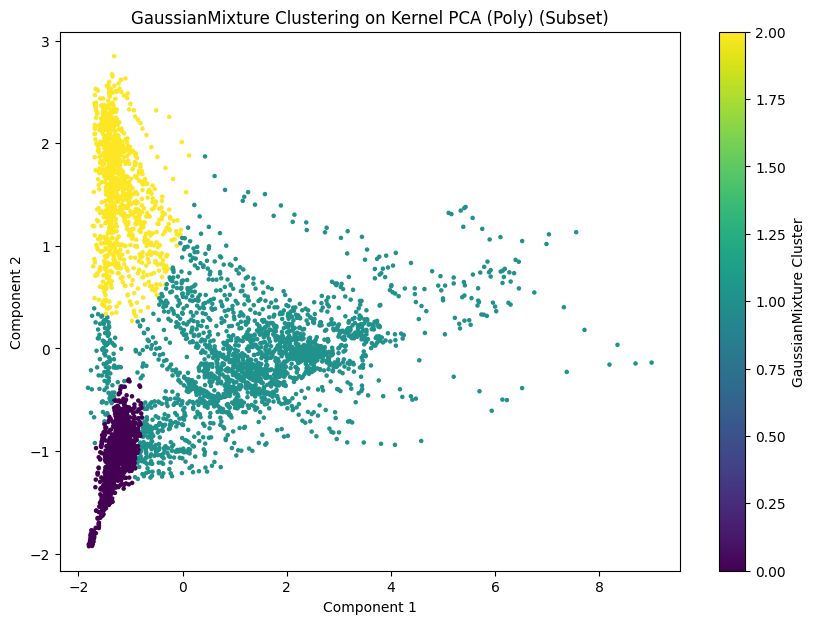

GaussianMixture on Min-Max Scaled
GaussianMixture Silhouette Score: 0.48489960195339965


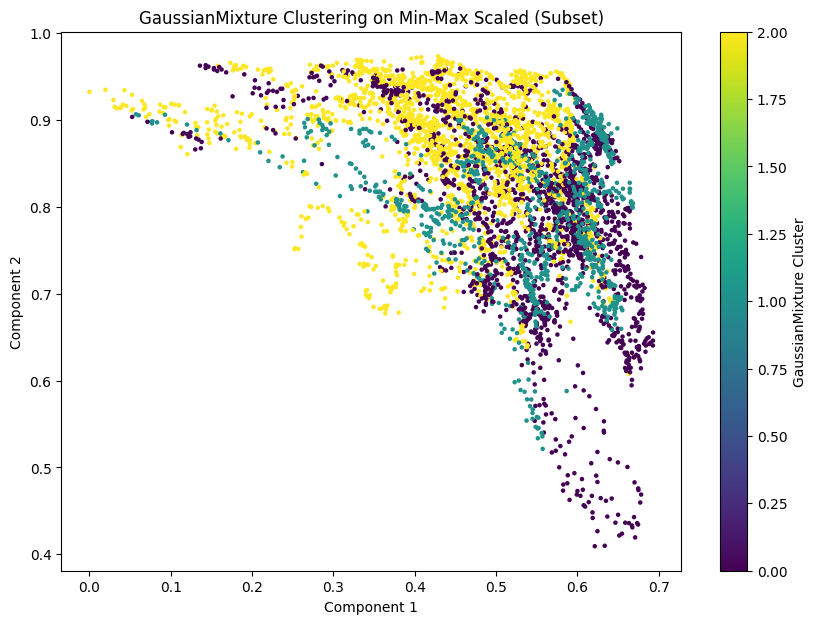

GaussianMixture on Normalized
GaussianMixture Silhouette Score: 0.4474291608391861


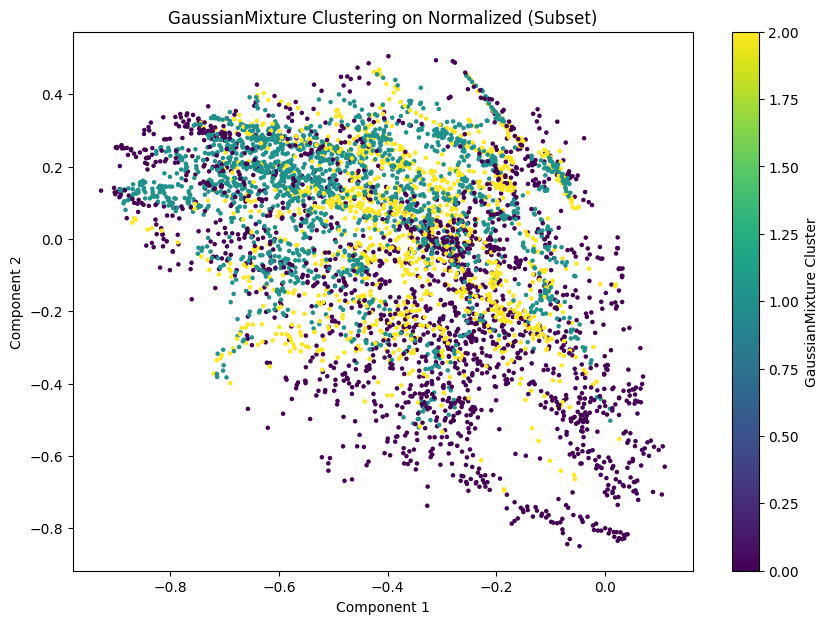

Spectral on Kernel PCA (RBF)
Spectral Silhouette Score: 0.7385784022981675


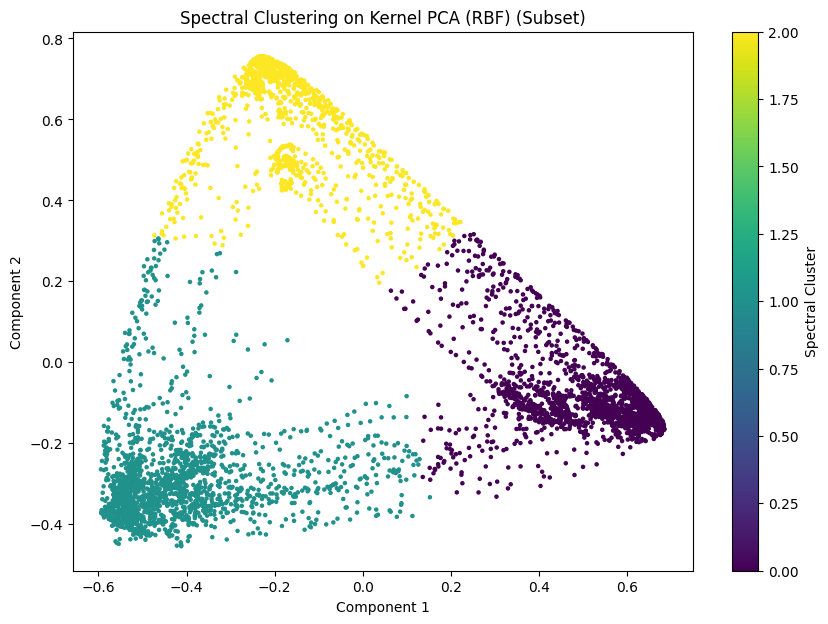

Spectral on Kernel PCA (Poly)
Spectral Silhouette Score: 0.6084187729897249


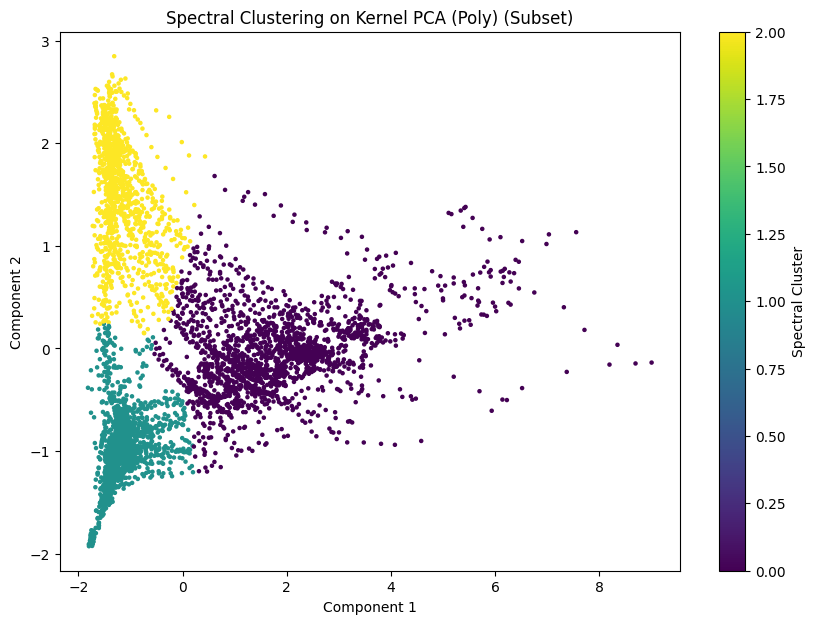

Spectral on Min-Max Scaled
Spectral Silhouette Score: 0.5361547510235075


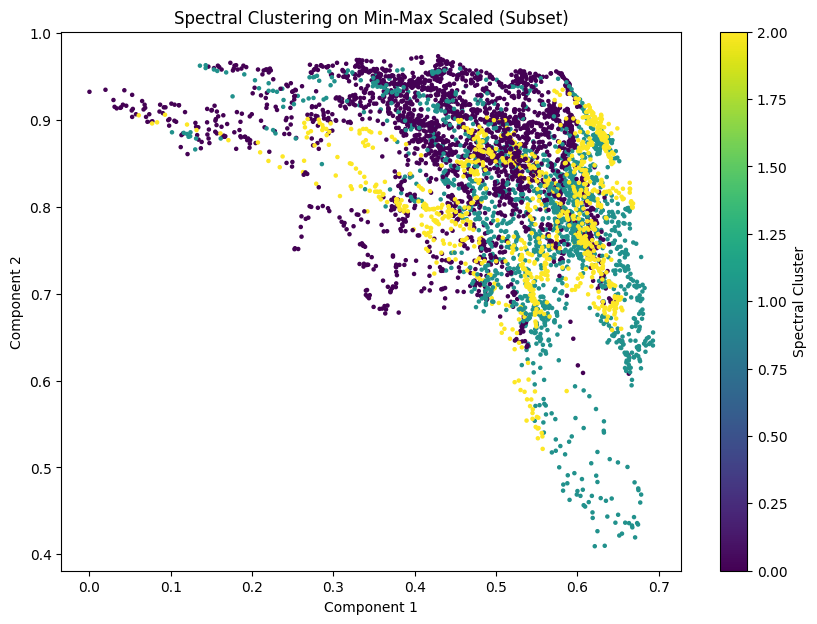

Spectral on Normalized
Spectral Silhouette Score: 0.33189456040843224


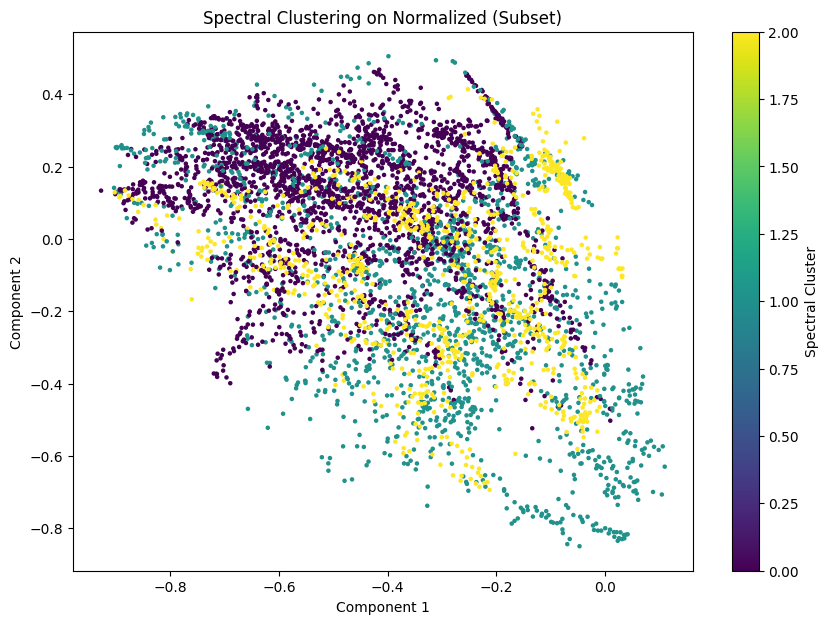

{'KMeans_kpca_rbf': np.float64(0.7429782957014517),
 'KMeans_kpca_poly': np.float64(0.6021024748192707),
 'KMeans_minmax': np.float64(0.5412402568034891),
 'KMeans_normalized': np.float64(0.47551634818190414),
 'Agglomerative_kpca_rbf': np.float64(0.7076846893491316),
 'Agglomerative_kpca_poly': np.float64(0.5481265230187977),
 'Agglomerative_minmax': np.float64(0.5250097492076684),
 'Agglomerative_normalized': np.float64(0.4542098433162382),
 'GaussianMixture_kpca_rbf': np.float64(0.6309643202953807),
 'GaussianMixture_kpca_poly': np.float64(0.5230578253457938),
 'GaussianMixture_minmax': np.float64(0.48489960195339965),
 'GaussianMixture_normalized': np.float64(0.4474291608391861),
 'Spectral_kpca_rbf': np.float64(0.7385784022981675),
 'Spectral_kpca_poly': np.float64(0.6084187729897249),
 'Spectral_minmax': np.float64(0.5361547510235075),
 'Spectral_normalized': np.float64(0.33189456040843224)}

In [ ]:
### Apply Log Transformation on Skewed Features ###
# Adding a small constant to avoid log(0)
features_log_transformed = np.log1p(features)

### Scaling and Normalization ###
# Standard Scaling
scaler = StandardScaler()
features_scaled_standard = scaler.fit_transform(features_log_transformed)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
features_scaled_minmax = minmax_scaler.fit_transform(features_log_transformed)

# Normalization
features_normalized = normalize(features_scaled_standard)

# Select a subset for clustering to reduce computation
subset_data_standard = features_scaled_standard[:5000]
subset_data_minmax = features_scaled_minmax[:5000]
subset_data_normalized = features_normalized[:5000]

### Dimensionality Reduction with Kernel PCA for Non-linear Clusters ###
# Kernel PCA with RBF kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
subset_data_kpca_rbf = kpca_rbf.fit_transform(subset_data_standard)

# Kernel PCA with Polynomial kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3)
subset_data_kpca_poly = kpca_poly.fit_transform(subset_data_standard)

# Set up clustering methods to test with transformed data
clustering_methods = {
    'KMeans': KMeans(n_clusters=3, random_state=0),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'GaussianMixture': GaussianMixture(n_components=3, random_state=0),
    'Spectral': SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
}

### Run Clustering on Different Transformations ###
def run_clustering_and_plot(data, method_name, labels, transformed_data_name):
    print(f"{method_name} on {transformed_data_name}")
    silhouette_avg = silhouette_score(data, labels)
    print(f"{method_name} Silhouette Score: {silhouette_avg}")

    # Plot the clustering results
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=5)
    plt.colorbar(label=f'{method_name} Cluster')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'{method_name} Clustering on {transformed_data_name} (Subset)')
    plt.show()
    return silhouette_avg

# Dictionary to store silhouette scores
silhouette_scores = {}

# Loop through transformations and apply each clustering method
for method_name, method in clustering_methods.items():
    # Standard Scaling + Kernel PCA with RBF kernel
    labels = method.fit_predict(subset_data_kpca_rbf)
    silhouette_scores[f"{method_name}_kpca_rbf"] = run_clustering_and_plot(
        subset_data_kpca_rbf, method_name, labels, "Kernel PCA (RBF)")
    
    # Standard Scaling + Kernel PCA with Polynomial kernel
    labels = method.fit_predict(subset_data_kpca_poly)
    silhouette_scores[f"{method_name}_kpca_poly"] = run_clustering_and_plot(
        subset_data_kpca_poly, method_name, labels, "Kernel PCA (Poly)")

    # Min-Max Scaling
    labels = method.fit_predict(subset_data_minmax)
    silhouette_scores[f"{method_name}_minmax"] = run_clustering_and_plot(
        subset_data_minmax, method_name, labels, "Min-Max Scaled")

    # Normalization
    labels = method.fit_predict(subset_data_normalized)
    silhouette_scores[f"{method_name}_normalized"] = run_clustering_and_plot(
        subset_data_normalized, method_name, labels, "Normalized")

silhouette_scores


### Clustering Results Summary

#### Best Overall Scores:
- **KMeans with Kernel PCA (RBF)**: 0.7429
- **Spectral Clustering with Kernel PCA (RBF)**: 0.7386
- **Agglomerative Clustering with Kernel PCA (RBF)**: 0.7077

The **RBF Kernel PCA transformation** paired with **KMeans** and **Spectral Clustering** produced the highest silhouette scores, indicating these combinations best captured the structure of the data. This non-linear transformation likely emphasized clusters more effectively than traditional scaling methods, leading to clearer separation and cohesion within clusters. 

These results suggest that leveraging **non-linear transformations** like RBF Kernel PCA with **KMeans** or **Spectral Clustering** could be optimal for this dataset.